In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import linalg as LA
from tqdm.notebook import tqdm

In [2]:
X = np.random.multivariate_normal([0,0], [[100, 6], [6, 1]], 500)*[2,0.1] + [-45, 0.5]

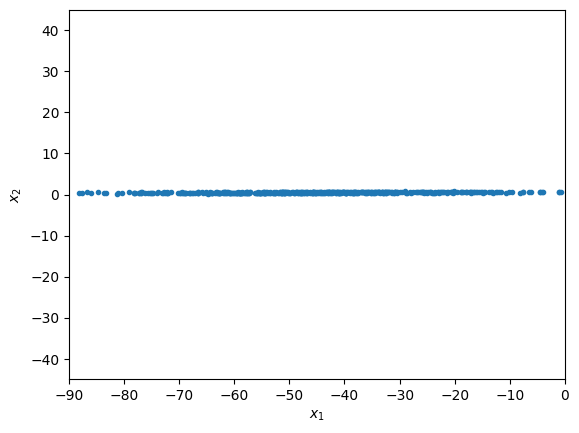

In [3]:
plt.plot(X[:,0],X[:,1],'.')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.axis([-90, 0, -45, 45])
plt.show()

In [4]:
X_mean = np.mean(X, axis=0).reshape(1,2)
X_std   = np.std(X, axis=0).reshape(1,2)
X_norm  = (X-X_mean)/X_std

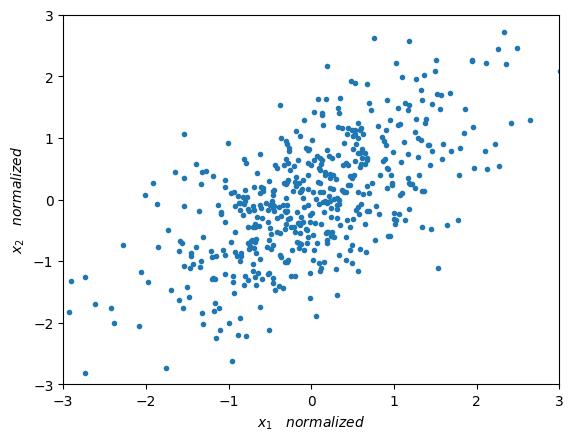

In [5]:
plt.plot(X_norm[:,0],X_norm[:,1],'.')
plt.xlabel(r'$x_1 \quad normalized $')
plt.ylabel(r'$x_2 \quad normalized $')
plt.axis([-3, 3, -3, 3])
plt.show()

In [6]:
# Here we calculate the covariance matrix. Notice that the mean = 0.
Cov_M = np.zeros((2,2))
for point in range(np.shape(X_norm)[0]):
    point_  = X_norm[point,:].reshape(1,2)
    Cov_M   = Cov_M + np.matmul(point_.T,point_)
Cov_M = Cov_M/np.shape(X_norm)[0] 

# We calculate the covariance matrix taking advantage of numpy's vectorization
Cov_M2 = np.matmul(X_norm.T, X_norm)/X_norm.shape[0]

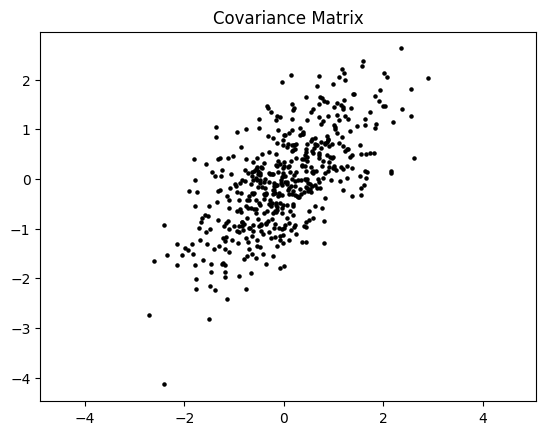

In [7]:
x_, y_ = np.random.multivariate_normal([0,0], Cov_M2, 500).T
plt.scatter(x_, y_, s=5, color='black')
plt.axis('equal')
plt.title('Covariance Matrix')
plt.show()

In [8]:
eigenVal, eigenVec = LA.eig(Cov_M)
print("eigenvalue 1 = ",eigenVal[0], "   eigenvector 1 = ",eigenVec[:,0])
print("eigenvalue 2 = ",eigenVal[1], "   eigenvector 2 = ",eigenVec[:,1])

eigenvalue 1 =  0.3516355542325875    eigenvector 1 =  [-0.70710678  0.70710678]
eigenvalue 2 =  1.6483644457674138    eigenvector 2 =  [-0.70710678 -0.70710678]


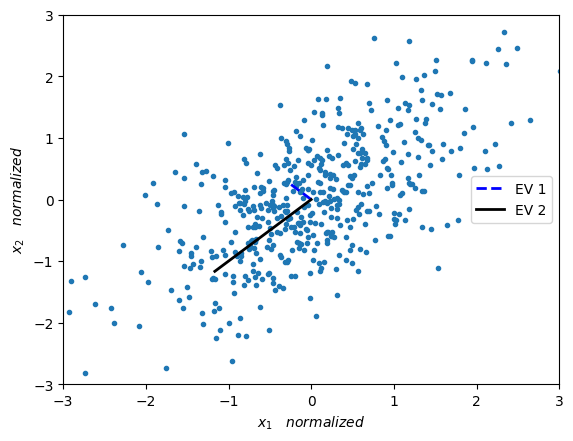

In [9]:
plt.plot(X_norm[:,0],X_norm[:,1],'.')
plt.plot([0,eigenVec[0,0]*eigenVal[0]],[0,eigenVec[1,0]*eigenVal[0]],'--', color='blue', label='EV 1', linewidth=2)
plt.plot([0,eigenVec[0,1]*eigenVal[1]],[0,eigenVec[1,1]*eigenVal[1]],'-', color='black', label='EV 2', linewidth=2)
plt.xlabel(r'$x_1 \quad normalized $')
plt.ylabel(r'$x_2 \quad normalized $')
plt.axis([-3, 3, -3, 3])
plt.legend(loc='center right')
plt.show()

In [10]:
max_idx = np.argmax(eigenVal, axis=0)
P_vec   = eigenVec[:,max_idx]
print('P_vec = ',P_vec)

P_vec =  [-0.70710678 -0.70710678]


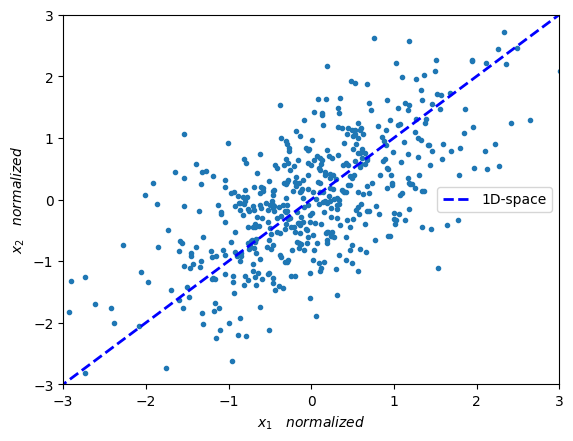

In [11]:
plt.plot(X_norm[:,0],X_norm[:,1],'.')
plt.plot([eigenVec[0,max_idx]*-10,eigenVec[0,max_idx]*10],
         [eigenVec[1,max_idx]*-10,eigenVec[1,max_idx]*10],'--', 
         color='blue', label='1D-space', linewidth=2.0)
plt.xlabel(r'$x_1 \quad normalized $')
plt.ylabel(r'$x_2 \quad normalized $')
plt.axis([-3, 3, -3, 3])
plt.legend(loc='center right')
plt.show()

In [12]:
# -- Projecting the data into the 1-dimensional space -- #

# -- Taking advantage of numpy's vectorization we can project the whole matrix -- #
P_vec  = P_vec.reshape(P_vec.shape[0],1) # reshaping for easier handling
Y_1D   = np.matmul(P_vec.T,X_norm.T)     # projecting into 1D
Y_norm = np.matmul(P_vec,Y_1D).T         # projecting 1D back into 2D

# Note: P_vec has norm 1, so there is no need to compute the norm

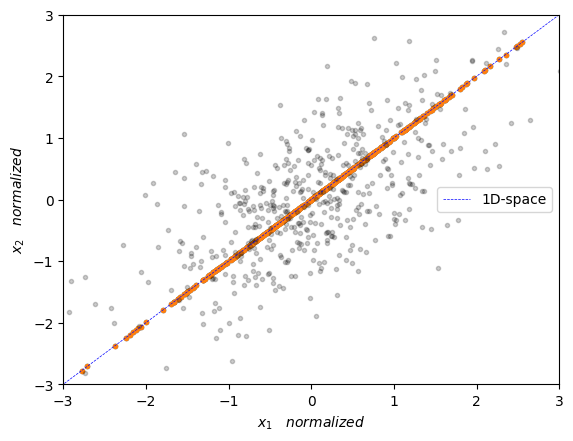

In [13]:
plt.plot(Y_norm[:],Y_norm[:],'.')
plt.plot(X_norm[:,0],X_norm[:,1],'.', alpha=0.2, color='black')
plt.plot([eigenVec[0,max_idx]*-10,eigenVec[0,max_idx]*10],[eigenVec[1,max_idx]*-10,eigenVec[1,max_idx]*10],'--', color='blue', label='1D-space', linewidth=0.5)
plt.xlabel(r'$x_1 \quad normalized $')
plt.ylabel(r'$x_2 \quad normalized $')
plt.axis([-3, 3, -3, 3])
plt.legend(loc='center right')
plt.show()

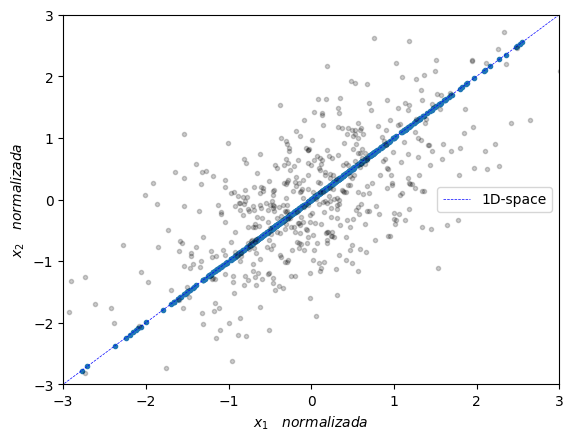

In [14]:
from sklearn.decomposition import PCA #import PCA from sklearn
pca = PCA(n_components=1)             # define how many principal components we wish to reduce our system to
pca.fit(X_norm)                       # obtain the components and its eigenvalues
X_pca = pca.transform(X_norm)         # apply dimensionality reduction
Y_pca = pca.inverse_transform(X_pca)  # get the data back on its original space

# visualize
plt.plot(Y_pca[:,0],Y_pca[:,1],'.')
plt.plot([eigenVec[0,max_idx]*-10,eigenVec[0,max_idx]*10],[eigenVec[1,max_idx]*-10,eigenVec[1,max_idx]*10],'--', color='blue', label='1D-space', linewidth=0.5)
plt.plot(X_norm[:,0],X_norm[:,1],'.', alpha=0.2, color='black')
plt.xlabel(r'$x_1 \quad normalizada $')
plt.ylabel(r'$x_2 \quad normalizada $')
plt.axis([-3, 3, -3, 3])
plt.legend(loc='center right')
plt.show()

In [15]:
data_dict = {}
for i in tqdm(range(22)):
  i_str = str(i)
  if len(i_str) == 1:
    term = '0'+i_str
  else:
    term = i_str
  for split in ['','_te']:
    term = term + split
    if 'google.colab' in str(get_ipython()):
      data_dict[term] = np.loadtxt('https://raw.githubusercontent.com/edgarsmdn/MLCE_book/main/references/d' 
                               + term + '.dat')
    else:
      data_dict[term] = np.loadtxt('references/d'+ term + '.dat')
data_dict['00'] = data_dict['00'].T

  0%|          | 0/22 [00:00<?, ?it/s]

In [16]:
data_dict['00'].shape

(500, 52)

(0.0, 500.0)

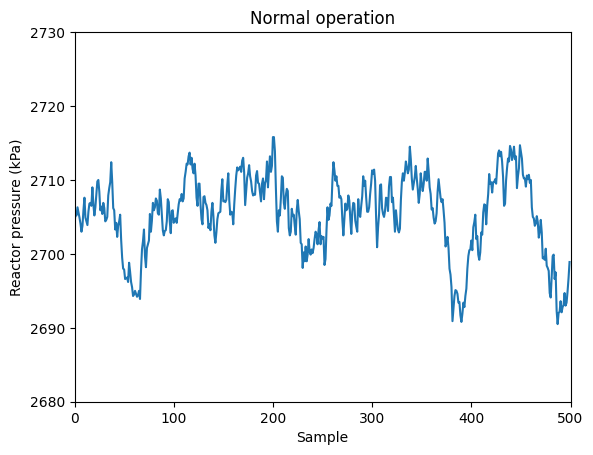

In [17]:
var = 7
plt.plot(data_dict['00'][:,var-1])
plt.xlabel('Sample')
plt.ylabel('Reactor pressure (kPa)')
plt.title('Normal operation')
plt.ylim(2680, 2730)
plt.xlim(0,500)

(0.0, 500.0)

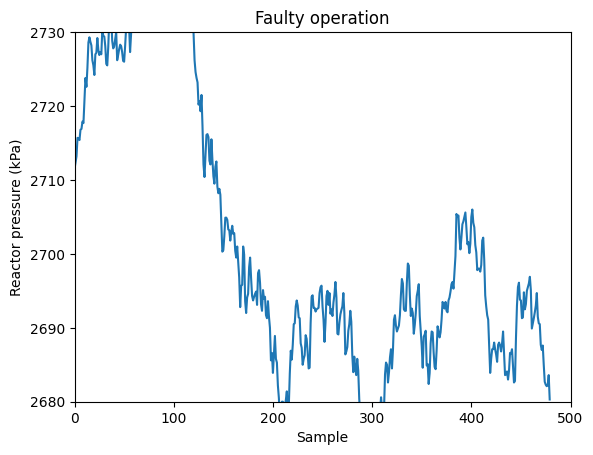

In [18]:
var = 7
plt.plot(data_dict['02'][:,var-1])
plt.xlabel('Sample')
plt.ylabel('Reactor pressure (kPa)')
plt.title('Faulty operation')
plt.ylim(2680, 2730)
plt.xlim(0,500)

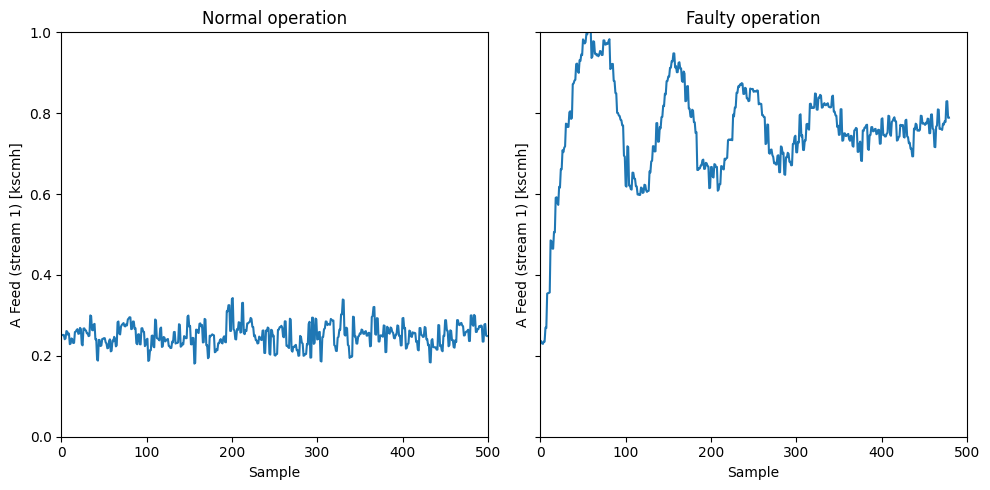

In [19]:
var = 1

fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

ylabel = 'A Feed (stream 1) [kscmh]'
ylim = [0, 1]

axs[0].plot(data_dict['00'][:,var-1])
axs[0].set_xlabel('Sample')
axs[0].set_ylabel(ylabel)
axs[0].set_title('Normal operation')
axs[0].set_ylim(ylim[0], ylim[1])
axs[0].set_xlim(0,500)

axs[1].plot(data_dict['01'][:,var-1])
axs[1].set_xlabel('Sample')
axs[1].set_ylabel(ylabel)
axs[1].set_title('Faulty operation')
axs[0].set_ylim(ylim[0], ylim[1])
axs[1].set_xlim(0,500)

plt.tight_layout()
plt.show()

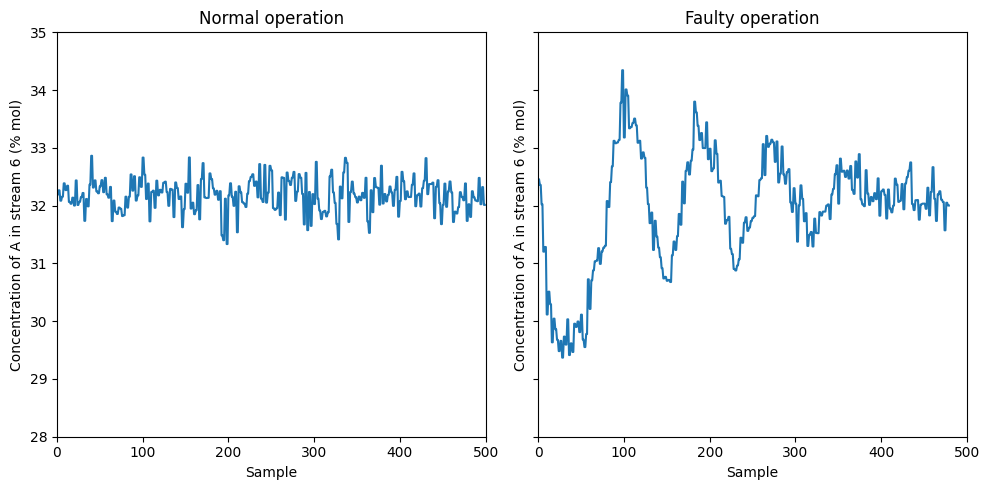

In [20]:
var = 23

fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

ylabel = 'Concentration of A in stream 6 (% mol)'
ylim = [28, 35]

axs[0].plot(data_dict['00'][:,var-1])
axs[0].set_xlabel('Sample')
axs[0].set_ylabel(ylabel)
axs[0].set_title('Normal operation')
axs[0].set_ylim(ylim[0], ylim[1])
axs[0].set_xlim(0,500)

axs[1].plot(data_dict['01'][:,var-1])
axs[1].set_xlabel('Sample')
axs[1].set_ylabel(ylabel)
axs[1].set_title('Faulty operation')
axs[0].set_ylim(ylim[0], ylim[1])
axs[1].set_xlim(0,500)

plt.tight_layout()
plt.show()

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [22]:
fault = '01'
X_train = np.hstack((data_dict['00'][:,:22],data_dict['00'][:,41:]))

In [23]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)

In [24]:
pca = PCA()
X_PCA = pca.fit_transform(X_train_norm)                       

Text(0.5, 0, 'Number of principal component')

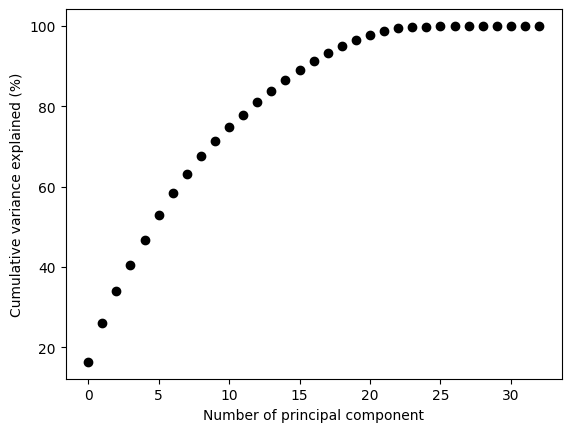

In [25]:
cum_var = np.cumsum(pca.explained_variance_ratio_ * 100)
plt.plot(cum_var, 'ko')
plt.ylabel('Cumulative variance explained (%)')
plt.xlabel('Number of principal component')

In [26]:
n_pcs = np.argmax(cum_var >= 90) +1
n_pcs

17

In [27]:
T = X_PCA[:, :n_pcs]
T.shape

(500, 17)

In [28]:
pca = PCA(n_components=0.9)
pca.fit(X_train_norm)
T_train = pca.transform(X_train_norm)
T_train.shape

(500, 17)

In [29]:
X_test = np.hstack((data_dict[fault+'_te'][:,:22],data_dict[fault+'_te'][:,41:]))
X_test_norm = scaler.transform(X_test)
T_test = pca.transform(X_test_norm)

In [30]:
X_test_norm_reconstruct = pca.inverse_transform(T_test)
X_test_norm_reconstruct.shape

(960, 33)

In [31]:
from scipy.stats import f, norm

def compute_T2(T):
    # Calculate the covariance matrix
    S = (1 / (T_train.shape[0] - 1)) * np.dot(T_train.T, T_train)

    # Perform eigenvalue decomposition
    eigenvalues, eigenvectors = np.linalg.eig(S)

    # Sort eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Compute z scores
    z = np.dot(np.dot(np.linalg.inv(np.diag(np.sqrt(eigenvalues))), eigenvectors.T), T.T)

    # Calculate T^2 statistic
    T2 = np.sum(z ** 2, axis=0)

    # Threshold for T2
    n_d, n_x = T_train.shape
    alpha = 0.01
    T2_alpha = n_x*(n_d-1)*(n_d+1)/(n_d*(n_d-n_x))*f.ppf(1-alpha, n_x, n_d-n_x)

    return T2, T2_alpha


def compute_Q(X_norm, X_reconstruct):
    # Compute the residual matrix
    R = X_norm - X_reconstruct

    # Compute Q statistic
    Q = np.sum(R**2,axis=1)

    # Threshold for Q
    S = (1 / (X_train_norm.shape[0] - 1)) * np.dot(X_train_norm.T, X_train_norm)
    eigenvalues, eigenvectors = np.linalg.eig(S)

    n_x = T_train.shape[1]
    n_d = eigenvalues.shape[0]
    alpha=0.01

    theta1 = np.sum(eigenvalues[n_x:n_d+1]**2)
    theta2 = np.sum(eigenvalues[n_x:n_d+1]**4)
    theta3 = np.sum(eigenvalues[n_x:n_d+1]**6)
    h0 = 1 - 2*theta1*theta3/(3*theta2**2)

    c_alpha = norm.ppf(1-alpha)
    Q_alpha = theta1*(h0*c_alpha*(2*theta2)**0.5/theta1 + 1 + theta2*h0*(h0-1)/(theta1**2))**(1/h0)

    return Q, Q_alpha


In [32]:
T2, T2_alpha = compute_T2(T_test)
Q, Q_alpha = compute_Q(X_test_norm, X_test_norm_reconstruct)

Text(0, 0.5, '$T^2$ index')

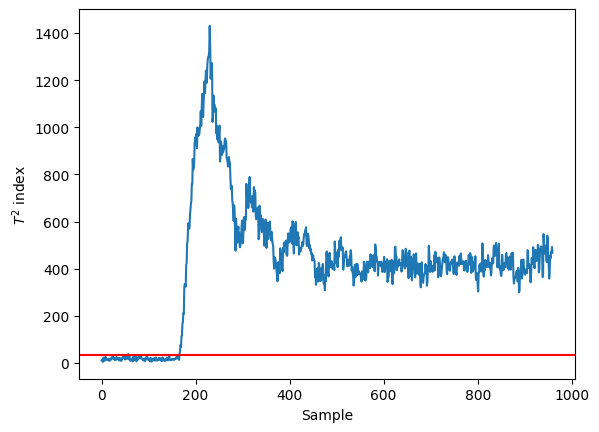

In [33]:
plt.plot(T2)
plt.axhline(y=T2_alpha, color='red')
plt.xlabel('Sample')
plt.ylabel('$T^2$ index')

Text(0, 0.5, 'Q index')

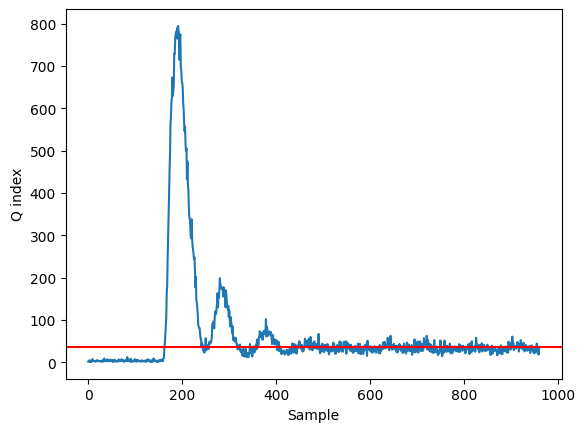

In [34]:
plt.plot(Q)
plt.axhline(y=T2_alpha, color='red')
plt.xlabel('Sample')
plt.ylabel('Q index')